In [18]:
import os
os.getcwd()
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [44]:
root_dir = "/workspace/data/results"
checkpoint_dir = pathlib.Path("gapfill_bs16_ep500_cap64_lr0.0003_0.0001_alpha5.0_2023-07-28-03:05:17")
file_path = root_dir / checkpoint_dir / "log_training.txt"

with open(file_path, "r") as file:
    lines = file.readlines()

# Join lines 14 onwards into a single string
start_line = 14
log_string = "".join(lines[start_line - 1 :])

print(log_string[:600])


2023-07-28 03:07:51,679 [INFO    ] epoch   1, train_g_loss:  5.855, train_d_loss:  0.725, train_mse:1.07241929, train_ssim:0.46064663, valid_g_loss:  0.598, valid_d_loss:  0.558, valid_mse:0.01339361, valid_ssim:0.71306378
2023-07-28 03:10:19,778 [INFO    ] epoch   2, train_g_loss:  1.654, train_d_loss:  0.450, train_mse:0.17998579, train_ssim:0.61284906, valid_g_loss:  1.438, valid_d_loss:  0.018, valid_mse:0.11447813, valid_ssim:0.52971089
2023-07-28 03:12:48,731 [INFO    ] epoch   3, train_g_loss:  1.001, train_d_loss:  0.500, train_mse:0.03626211, train_ssim:0.68431455, valid_g_loss:  0.62


In [45]:

# Split the log into individual lines
log_lines = log_string.strip().split('\n')
for line in log_lines[:3]:
    parts = line.split(',')
    print (parts)

['2023-07-28 03:07:51', '679 [INFO    ] epoch   1', ' train_g_loss:  5.855', ' train_d_loss:  0.725', ' train_mse:1.07241929', ' train_ssim:0.46064663', ' valid_g_loss:  0.598', ' valid_d_loss:  0.558', ' valid_mse:0.01339361', ' valid_ssim:0.71306378']
['2023-07-28 03:10:19', '778 [INFO    ] epoch   2', ' train_g_loss:  1.654', ' train_d_loss:  0.450', ' train_mse:0.17998579', ' train_ssim:0.61284906', ' valid_g_loss:  1.438', ' valid_d_loss:  0.018', ' valid_mse:0.11447813', ' valid_ssim:0.52971089']
['2023-07-28 03:12:48', '731 [INFO    ] epoch   3', ' train_g_loss:  1.001', ' train_d_loss:  0.500', ' train_mse:0.03626211', ' train_ssim:0.68431455', ' valid_g_loss:  0.621', ' valid_d_loss:  0.321', ' valid_mse:0.02881602', ' valid_ssim:0.75296789']


In [46]:
lines = log_string.strip().split('\n')

# Create lists to store statistics for each epoch
timestamps = []
epochs = []
train_g_losses = []
train_d_losses = []
train_mses = []
train_ssims = []
valid_g_losses = []
valid_d_losses = []
valid_mses = []
valid_ssims = []

# Process each line to extract statistics for each epoch
for line in lines:
    # Split the line by commas
    parts = line.split(',')
    
    # Extract epoch number from the 'epoch' part
    epoch = int(parts[1][-4:].strip())
    
    # Extract metrics for the epoch
    metrics = {}
    for part in parts[2:]:
        key, value = part.strip().split(':')
        metrics[key.strip()] = float(value.strip())
    
    # Append statistics to the respective lists
    epochs.append(epoch)
    train_g_losses.append(metrics['train_g_loss'])
    train_d_losses.append(metrics['train_d_loss'])
    train_mses.append(metrics['train_mse'])
    train_ssims.append(metrics['train_ssim'])
    valid_g_losses.append(metrics['valid_g_loss'])
    valid_d_losses.append(metrics['valid_d_loss'])
    valid_mses.append(metrics['valid_mse'])
    valid_ssims.append(metrics['valid_ssim'])

# Create a dictionary with the extracted statistics
data = {
    "Epoch": epochs,
    "Train_G_Loss": train_g_losses,
    "Train_D_Loss": train_d_losses,
    "Train_MSE": train_mses,
    "Train_SSIM": train_ssims,
    "Valid_G_Loss": valid_g_losses,
    "Valid_D_Loss": valid_d_losses,
    "Valid_MSE": valid_mses,
    "Valid_SSIM": valid_ssims,
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

   Epoch  Train_G_Loss  Train_D_Loss  Train_MSE  Train_SSIM  Valid_G_Loss  \
0      1         5.855         0.725   1.072419    0.460647         0.598   
1      2         1.654         0.450   0.179986    0.612849         1.438   
2      3         1.001         0.500   0.036262    0.684315         0.621   
3      4         0.829         0.562   0.039935    0.702464         0.142   
4      5         0.658         0.643   0.025352    0.731041        -0.302   

   Valid_D_Loss  Valid_MSE  Valid_SSIM  
0         0.558   0.013394    0.713064  
1         0.018   0.114478    0.529711  
2         0.321   0.028816    0.752968  
3         0.556   0.008557    0.713807  
4         0.900   0.010747    0.769386  


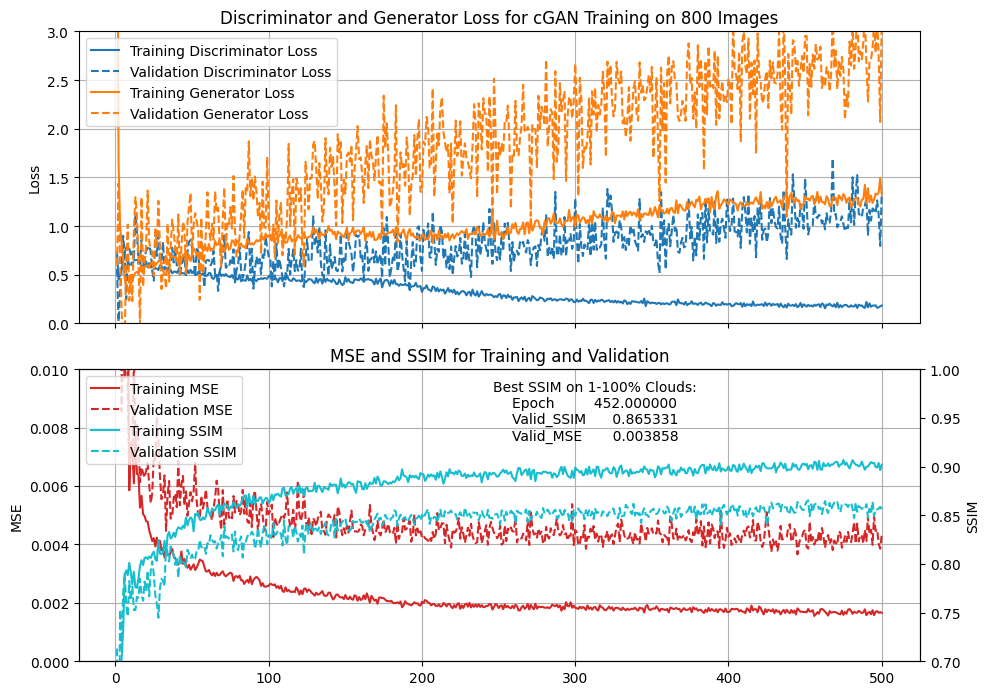

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting D Loss and G Loss for both training and validation
ax1.plot(df["Epoch"], df["Train_D_Loss"], color="tab:blue", label="Training Discriminator Loss")
ax1.plot(df["Epoch"], df["Valid_D_Loss"], color="tab:blue", linestyle="--", label="Validation Discriminator Loss")
ax1.plot(df["Epoch"], df["Train_G_Loss"], color="tab:orange", label="Training Generator Loss")
ax1.plot(df["Epoch"], df["Valid_G_Loss"], color="tab:orange", linestyle="--", label="Validation Generator Loss")

ax1.set_ylabel("Loss")
ax1.set_ylim(0, 3.0)
ax1.set_title("Discriminator and Generator Loss for cGAN Training on 800 Images")
plt.suptitle("Best SSIM on 1-100% Clouds:\n" + str(df.iloc[df["Valid_SSIM"].idxmax(), [0,-1,-2]])[:75], fontsize=10, y=0.4, x = 0.6)
ax1.legend()
ax1.grid(True)

# Plotting MSE and SSIM on separate y-axes
ax2.plot(df["Epoch"], df["Train_MSE"], color="tab:red", label="Training MSE")
ax2.plot(df["Epoch"], df["Valid_MSE"], color="tab:red", linestyle="--", label="Validation MSE")
ax2.set_ylabel("MSE")
ax2.set_ylim(0, 0.01)

ax2_2 = ax2.twinx()
ax2_2.plot(df["Epoch"], df["Train_SSIM"], color="tab:cyan", label="Training SSIM")
ax2_2.plot(df["Epoch"], df["Valid_SSIM"], linestyle="--", color="tab:cyan", label="Validation SSIM")
ax2_2.set_ylabel("SSIM")
ax2_2.set_ylim(0.7, 1.0)

# Adding legend for the second y-axis
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2_2.legend(lines + lines2, labels + labels2)

ax2.set_title("MSE and SSIM for Training and Validation")
ax2.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
filename = checkpoint_dir / 'training_graph.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')